# Refactored GD2D

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as dp
import sympy as sym
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Python Function

In [ ]:
# Initializing The Python Function
def run_gradient(f, dfx, dfy, start, lr=0.01, epochs=1000, tol=1e-5,
                 mode="descent", domain_bounds=None):
    """
    Run 2D gradient descent or ascent on a given function f.

    - f    : scalar function f(x, y)
    - dfx  : partial derivative ∂f/∂x
    - dfy  : partial derivative ∂f/∂y
    - start: np.array([x0, y0])
    - lr   : learning rate
    - epochs: max iterations
    - tol  : gradient-norm tolerance
    - mode : "descent" or "ascent"
    - domain_bounds: [min, max] or None (no check)
    """
    x = start.copy()
    x_start = start.copy()
    trajectory = np.zeros((epochs, 2))
    slot = 0

    sign = -1 if mode == "descent" else 1  # minus for descent, plus for ascent

    for i in range(epochs):
        grad = np.array([dfx(x[0], x[1]),
                         dfy(x[0], x[1])])

        # convergence check
        if np.linalg.norm(grad) < tol:
            print(f"{mode.capitalize()} converged at iter {i}, |grad|={np.linalg.norm(grad):.2e}")
            break

        # update
        x = x + sign * lr * grad

        # domain check
        if domain_bounds is not None:
            if (x[0] < domain_bounds[0] or x[0] > domain_bounds[1] or
                x[1] < domain_bounds[0] or x[1] > domain_bounds[1]):
                print(f"{mode.capitalize()} left domain at iter {i}")
                break

        trajectory[slot, :] = x
        slot += 1
    print(f"Final point: {x}")
    print(f"Starting point: {x_start}")
    print(f"Function value at final point: {f(x[0], x[1])}")

    return x, trajectory[:slot]


def plot_gradient_result(f, plot_x, plot_y, x_range, y_range,
                         start, final_point, trajectory,
                         title="", mode="descent"):
    """Helper to plot gradient descent/ascent results."""
    plt.figure(figsize=(8, 6))
    plt.imshow(f(plot_x, plot_y), extent=[x_range[0], x_range[-1], y_range[0], y_range[-1]],
                vmin=-5, vmax=5, origin='lower', cmap='viridis')
    plt.plot(start[0], start[1], 'bs', markersize=10)
    plt.plot(final_point[0], final_point[1], 'ro', markersize=10)
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-', linewidth=2)

    if mode == "descent":
        plt.legend(['Starting Point', 'Local Minimum', 'Gradient Descent Trajectory'])
    else:
        plt.legend(['Starting Point', 'Local Max', 'Gradient Ascent Trajectory'])

    plt.colorbar()
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()



## Initializing Math Functions

In [ ]:
# Initializing Variable
x = sym.Symbol('x')
y = sym.Symbol('y')


# Initializing The 1st Function
fxy = x**2 + y**2 + 0.5*sym.cos(x*sym.pi) + 2*sym.cos(y*sym.pi/2)

print('fxy: ')
dp.display(fxy)

# Initialize The 2nd Function
gxy = 3*(1-x)**2*sym.exp(-x**2-(y+1)**2) -10*(x/5 - x**3 - y**5)*sym.exp(-x**2-y**2)-1/3*sym.exp(-(x+1)**2-y**2)

print('\n\ngxy: ')
dp.display(gxy)

# Computing Partial Derivatives
dfx_sym = sym.diff(fxy,x)
dfy_sym = sym.diff(fxy,y)
print('\n\ndfx: ')
dp.display(dfx_sym)
print('\n\ndfy: ')
dp.display(dfy_sym)

dgx_sym = sym.diff(gxy,x)
dgy_sym = sym.diff(gxy,y)
print('\n\ndgx: ')
dp.display(dgx_sym)
print('\n\ndgy: ')
dp.display(dgy_sym)


# Converting the functions into Numpy Functions using lambdify
fxy = sym.lambdify((x,y),fxy)
gxy = sym.lambdify((x,y),gxy)
dfx = sym.lambdify((x,y),dfx_sym)
dfy = sym.lambdify((x,y),dfy_sym)
dgx = sym.lambdify((x,y),dgx_sym)
dgy = sym.lambdify((x,y),dgy_sym)

fxy: 


x**2 + y**2 + 0.5*cos(pi*x) + 2*cos(pi*y/2)



gxy: 


3*(1 - x)**2*exp(-x**2 - (y + 1)**2) - (-10*x**3 + 2*x - 10*y**5)*exp(-x**2 - y**2) - 0.333333333333333*exp(-y**2 - (x + 1)**2)



dfx: 


2*x - 0.5*pi*sin(pi*x)



dfy: 


2*y - pi*sin(pi*y/2)



dgx: 


-6*x*(1 - x)**2*exp(-x**2 - (y + 1)**2) + 2*x*(-10*x**3 + 2*x - 10*y**5)*exp(-x**2 - y**2) - (2 - 30*x**2)*exp(-x**2 - y**2) - 0.333333333333333*(-2*x - 2)*exp(-y**2 - (x + 1)**2) + 3*(2*x - 2)*exp(-x**2 - (y + 1)**2)



dgy: 


50*y**4*exp(-x**2 - y**2) + 2*y*(-10*x**3 + 2*x - 10*y**5)*exp(-x**2 - y**2) + 0.666666666666667*y*exp(-y**2 - (x + 1)**2) + 3*(1 - x)**2*(-2*y - 2)*exp(-x**2 - (y + 1)**2)

## Running All 4 cases for each function

Descent converged at iter 267, |grad|=9.65e-06
Final point: [ 0.67265831 -1.3453198 ]
Starting point: [ 0.39910474 -1.17697095]
Function value at final point: 0.9718162122559073


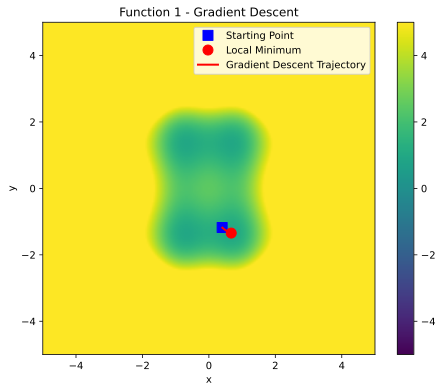

Ascent left domain at iter 68
Final point: [5.09479524 0.72925448]
Starting point: [1.27193102 1.29319517]
Function value at final point: 26.835922459425284


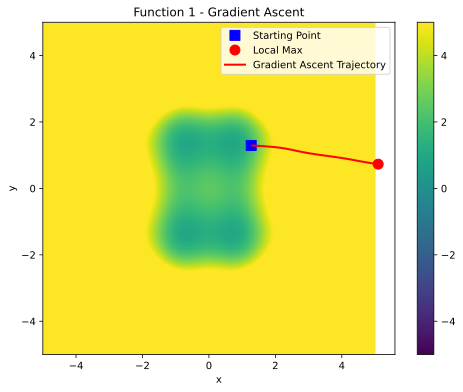

Descent converged at iter 193, |grad|=9.38e-06
Final point: [-1.34739586  0.20451989]
Starting point: [-1.4877122   1.56598666]
Function value at final point: -3.049849402795114


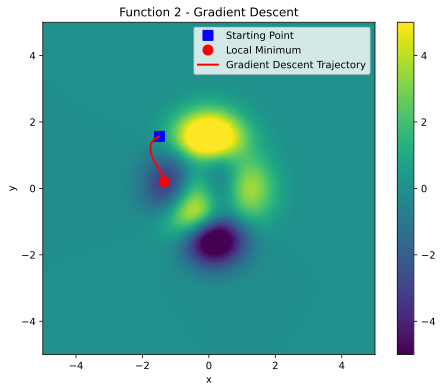

Ascent converged at iter 98, |grad|=8.75e-06
Final point: [-0.46002408 -0.62919609]
Starting point: [-0.33570477  0.14183451]
Function value at final point: 3.776580998529557


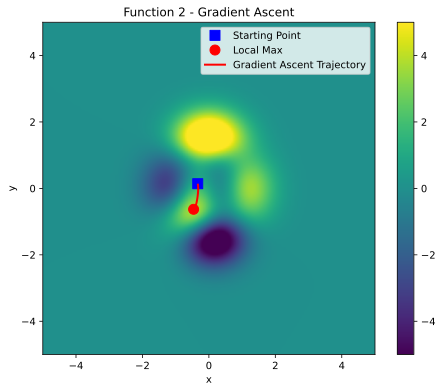

In [ ]:
## Running the Function

# Setting up plotting grid
domain_bounds = [-5, 5]
x_range = np.linspace(-5, 5, 201)
y_range = np.linspace(-5, 5, 201)
plot_x, plot_y = np.meshgrid(x_range, y_range)

# ===== FXY: Descent =====
start_f_desc = np.random.rand(2)*4-2
localmin_f, traj_f_desc = run_gradient(fxy, dfx, dfy, start_f_desc,
                                       mode="descent", domain_bounds=domain_bounds)
plot_gradient_result(fxy, plot_x, plot_y, x_range, y_range,
                     start_f_desc, localmin_f, traj_f_desc,
                     title="Function 1 - Gradient Descent", mode="descent")

# ===== FXY: Ascent =====
start_f_asc = np.random.rand(2)*4-2
localmax_f, traj_f_asc = run_gradient(fxy, dfx, dfy, start_f_asc,
                                      mode="ascent", domain_bounds=domain_bounds)
plot_gradient_result(fxy, plot_x, plot_y, x_range, y_range,
                     start_f_asc, localmax_f, traj_f_asc,
                     title="Function 1 - Gradient Ascent", mode="ascent")

# ===== GXY: Descent =====
start_g_desc = np.random.rand(2)*4-2
localmin_g, traj_g_desc = run_gradient(gxy, dgx, dgy, start_g_desc,
                                       mode="descent", domain_bounds=domain_bounds)
plot_gradient_result(gxy, plot_x, plot_y, x_range, y_range,
                     start_g_desc, localmin_g, traj_g_desc,
                     title="Function 2 - Gradient Descent", mode="descent")

# ===== GXY: Ascent =====
start_g_asc = np.random.rand(2)*4-2
localmax_g, traj_g_asc = run_gradient(gxy, dgx, dgy, start_g_asc,
                                      mode="ascent", domain_bounds=domain_bounds)
plot_gradient_result(gxy, plot_x, plot_y, x_range, y_range,
                     start_g_asc, localmax_g, traj_g_asc,
                     title="Function 2 - Gradient Ascent", mode="ascent")